In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("data/20221204_pwm3901/data_20221204-230502.csv")

In [5]:
data

,Unnamed: 0,dt,kalman_vx,kalman_vy,kalman_vz,openvr_vx,openvr_vy,openvr_vz,pwm3901_vx,pwm3901_vy
0,0,0.573421,0.002182,-0.010955,0.009981,-0.007026,-0.002546,0.008575,0.000000,0.000000
1,1,1.112924,-0.000057,-0.001994,-0.004119,-0.005191,-0.002056,-0.001347,0.000000,0.000000
2,2,1.641201,-0.001835,0.000074,-0.013241,0.005696,0.003665,-0.000095,0.000000,0.000000
3,3,2.176531,-0.001501,-0.003385,0.013939,0.007430,0.005970,-0.001012,0.000000,0.000000
4,4,2.702671,-0.000095,0.005308,0.003536,0.007303,0.008561,-0.000587,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
1882,1882,1018.068367,0.030913,0.063038,0.006741,0.243239,0.008882,-0.096966,0.175476,0.002318
1883,1883,1018.591885,0.230896,0.003732,0.006698,0.200755,0.070449,0.048296,0.058141,0.061124
1884,1884,1019.115923,0.090035,0.041313,-0.009996,0.126739,-0.093860,0.034460,0.052241,0.038747
1885,1885,1019.648287,0.061777,-0.007735,0.005864,0.319026,-0.291204,-0.144389,0.266656,-0.032988


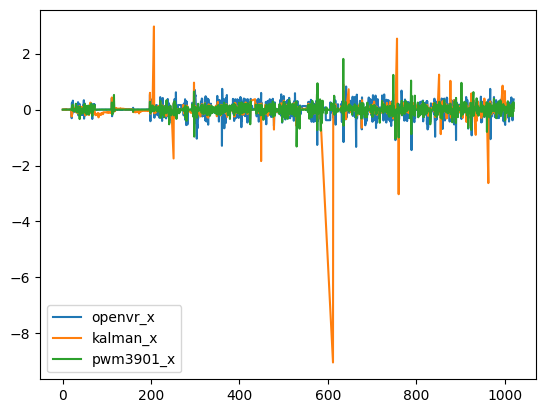

In [6]:
# plot x velocity
plt.plot(data['dt'],data['openvr_vx'],label="openvr_x")
plt.plot(data['dt'],data['kalman_vx'],label="kalman_x")
plt.plot(data['dt'],data['pwm3901_vx'],label="pwm3901_x")
plt.legend()
plt.show()

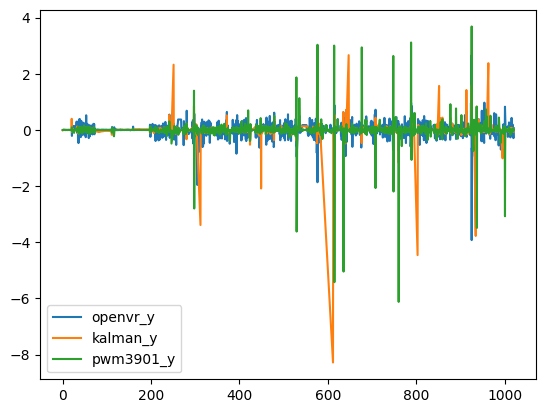

In [7]:
# plot x velocity
plt.plot(data['dt'],data['openvr_vy'],label="openvr_y")
plt.plot(data['dt'],data['kalman_vy'],label="kalman_y")
plt.plot(data['dt'],data['pwm3901_vy'],label="pwm3901_y")
plt.legend()
plt.show()

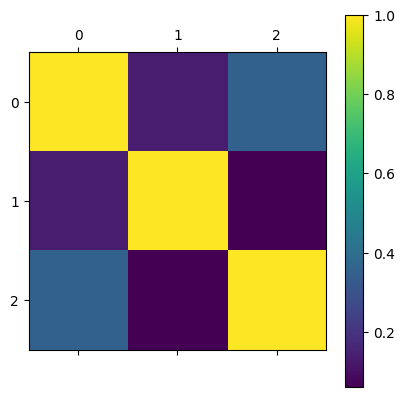

array([[1.        , 0.13114382, 0.35115578],
       [0.13114382, 1.        , 0.06093464],
       [0.35115578, 0.06093464, 1.        ]])

In [8]:
stacked_vx_mat = np.stack([
    data['openvr_vx'],
    data['kalman_vx'],
    data['pwm3901_vx']
],axis=0)

vx_corrcoef = np.corrcoef(stacked_vx_mat,rowvar=True)
plt.matshow(vx_corrcoef)
plt.colorbar()
plt.show()

vx_corrcoef

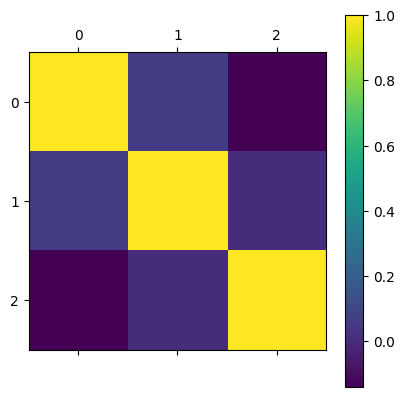

array([[ 1.        ,  0.06065598, -0.13936059],
       [ 0.06065598,  1.        ,  0.00741142],
       [-0.13936059,  0.00741142,  1.        ]])

In [9]:
stacked_vy_mat = np.stack([
    data['openvr_vy'],
    data['kalman_vy'],
    data['pwm3901_vy']
],axis=0)

vy_corrcoef = np.corrcoef(stacked_vy_mat,rowvar=True)
plt.matshow(vy_corrcoef)
plt.colorbar()
plt.show()

vy_corrcoef